<a href="https://colab.research.google.com/github/ishanmorwal/cats-v-dogs/blob/main/CatsvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#An Introduction  
This here was my answer to the [Cats vs Dogs Kaggle challenge](https://kaggle,com/datasets/karakaggle/kaggle-cat-vs-dog-dataset) (that I was met with in my Coursera course). Cats vs Dogs is a famous Kaggle Challenge that involves programming an image classification model to classify Cats vs Dogs. It's difficulty ranges from easy to intermediate, and is a really good coding challenge for beginners.

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

After the imports, the next step is to download the original dataset, which is made possible using wget.

In [2]:
!wget --no-check-certificate \
  "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
-O  "/tmp/cats-and-dogs.zip"

lzip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(lzip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2024-02-14 09:32:46--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.198.34.10, 2600:1407:3c00:ea3::317f, 2600:1407:3c00:e9b::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.198.34.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   111MB/s    in 8.5s    

2024-02-14 09:32:55 (92.2 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



The dataset would have been downloaded and stored within the specified directory (/tmp/PetImages). There are two sub-directories (for cats and for dogs)



In [3]:
src_path = '/tmp/PetImages'

src_path_cats = os.path.join(src_path,'Cat')
src_path_dogs = os.path.join(src_path,'Dog')

#Important! Delete all non-image files from the directories
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

#Below code returns a list containing all files under the given directories
print(f"There are {len(os.listdir(src_path_cats))} images of cats.")
print(f"There are {len(os.listdir(src_path_dogs))} images of dogs.")

There are 12500 images of cats.
There are 12500 images of dogs.


**Expected Output:**


```
There are 12500 images of cats.
There are 12500 images of dogs.
```



Now comes the part where we divide the directories and the data within for *training* and *validation*.

In [4]:
root_dir = '/tmp/cats-v-dogs'

#Code below makes sure that directory is empty:
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

#This function creates the training and validation directories:

def create_train_val_dirs(root_path):
  #does not return anything

  os.makedirs(os.path.join(root_path,'training'))
  os.makedirs(os.path.join(root_path,'validation'))
  os.makedirs(os.path.join(root_path,'training/cats'))
  os.makedirs(os.path.join(root_path,'training/dogs'))
  os.makedirs(os.path.join(root_path,'validation/cats'))
  os.makedirs(os.path.join(root_path,'validation/dogs'))


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("Shouldn't be seeing this.")


In [5]:
#For checking if those directories are created

for rootdir,dirs,files in os.walk(root_dir):
  for subdir in dirs:
    print(os.path.join(rootdir,subdir))

/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/validation/dogs


**Expected Output:**


```
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/validation/dogs
```



The next step is to code a `split_data` function, which takes in the following arguments:


*   SOURCE_DIR: the directory containing the files
*   TRAINING_DIR: directory that a portion of files would be copied to (for training)
*   VALIDATION_DIR: Similar to TRAINING_DIR, but for validation
*   SPLIT_SIZE: this determines the portion ofimages used for training.





The reason behind the randomization of the files that we would be doing in the function described below, so that the training data is randomized and so is the validation, which in turn, helps us train an efficient model.

As for the SPLIT_SIZE, if it is .9, then 90% of images in PetImages/Cat would be copied to the TRAINING_DIR, and the rest to the VALIDATION_DIR.

Plus, if in the dataset, there are images that have zero file length (that is, are irrelevent or empty), we would need to check the images as well.

In [6]:
def split_data(SOURCE_DIR,TRAINING_DIR,VALIDATION_DIR,SPLIT_SIZE):
  filtered = []

  for file_name in os.listdir(SOURCE_DIR):
    file_path = os.path.join(SOURCE_DIR,file_name)
    if os.path.getsize(file_path):
      filtered.append(file_name)
    else:
      print(f"{file_name} is zero length, so ignoring")

  random_files = random.sample(filtered,len(filtered))
  split = int(SPLIT_SIZE*len(filtered))
  training_files = random_files[:split]
  validation_files = random_files[split:]

  for file_name in training_files:
    copyfile(os.path.join(SOURCE_DIR,file_name),os.path.join(TRAINING_DIR,file_name))

  for file_name in validation_files:
    copyfile(os.path.join(SOURCE_DIR,file_name),os.path.join(VALIDATION_DIR,file_name))


In [7]:
# For testing the split_data function:

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR,"cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR,"cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR,"dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR,"dogs/")

# Empties the directories beforehand, in case of multiple uses
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Specify the split ratio:
split_size = .9

# Running the function
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Original directories:
print(f"\n Original cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"\n Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images")

# Training and validation splits
print(f"\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring

 Original cat's directory has 12500 images

 Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


#**Generators**
 Post data organization, the most important step is coding the generators, that is the *ImageDataGenerators*.
Whatever the image resolution in our set is, we can convert each image to a standard of our own choosing using 'target_size' in our flow_from_directory method. The default here is (150,150).

In [22]:
def train_val_generators(TRAINING_DIR,VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                     rotation_range = 20,
                                     width_shift_range = .2,
                                     height_shift_range=.2,
                                     shear_range=.1,
                                     zoom_range=.1,
                                     horizontal_flip=True,
                                     fill_mode="nearest")
  train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size =15,
                                                      class_mode ="binary",
                                                      target_size = (150,150))
  validation_datagen = ImageDataGenerator(rescale=1.0/255)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=15,
                                                                class_mode="binary",
                                                                target_size=(150,150))
  return train_generator,validation_generator

In [23]:
#Test your generators using this piece of code
train_generator,validation_generator = train_val_generators(TRAINING_DIR,VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# **Model Creation**

The last step before training is the creation of the required model, which is made possible through Keras' Sequential model.

Using the loss function allows us to better understand the output of our network, along with its accuracy.

In [24]:
def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  from tensorflow.keras.optimizers import RMSprop
  model.compile(optimizer=RMSprop(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [25]:
# Now time to train your model:

model = create_model()

# May take some time
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)


Epoch 1/15
 999/1500 [==================>...........] - ETA: 52s - loss: 0.6596 - accuracy: 0.5960

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1500/1500 [==============================] - 171s 111ms/step - loss: 0.6468 - accuracy: 0.6146 - val_loss: 0.5729 - val_accuracy: 0.7112
Epoch 2/15
1500/1500 [==============================] - 168s 112ms/step - loss: 0.5874 - accuracy: 0.6865 - val_loss: 0.5209 - val_accuracy: 0.7412
Epoch 3/15
1500/1500 [==============================] - 165s 110ms/step - loss: 0.5637 - accuracy: 0.7058 - val_loss: 0.5007 - val_accuracy: 0.7448
Epoch 4/15
1500/1500 [==============================] - 161s 108ms/step - loss: 0.5424 - accuracy: 0.7234 - val_loss: 0.4760 - val_accuracy: 0.7772
Epoch 5/15
1500/1500 [==============================] - 158s 105ms/step - loss: 0.5234 - accuracy: 0.7349 - val_loss: 0.4539 - val_accuracy: 0.7944
Epoch 6/15
1500/1500 [==============================] - 158s 105ms/step - loss: 0.5113 - accuracy: 0.7464 - val_loss: 0.4514 - val_accuracy: 0.7852
Epoch 7/15
1500/1500 [==============================] - 157s 105ms/step - loss: 0.4932 - accuracy: 0.7560 - val_loss: 0.441

Post training, to analyze the accuracy and loss of your model over time, you can plot your output using the code block below.

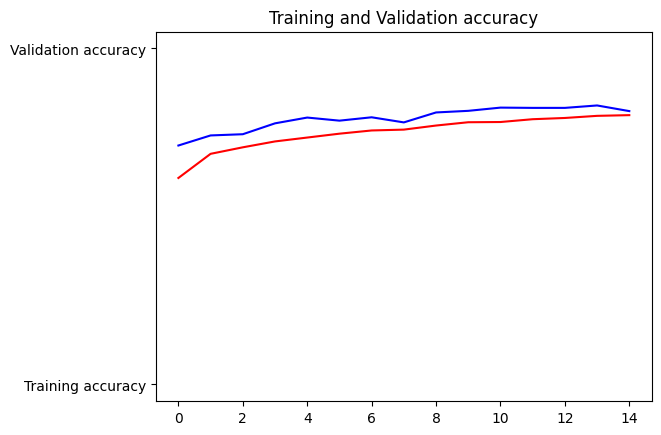

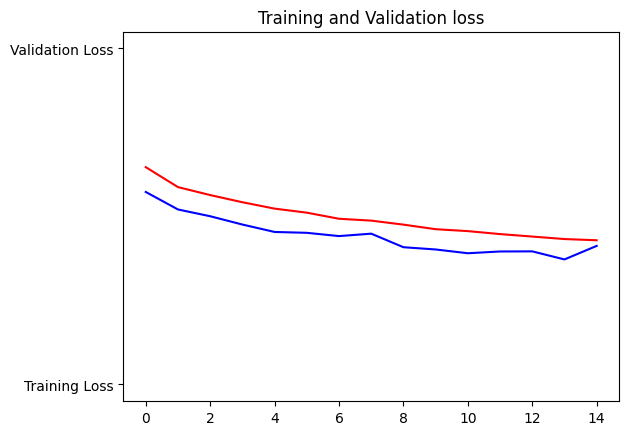

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Receives number of epochs

# Plotting training and validation ACCURACY
plt.plot(epochs,acc,'r',"Training accuracy")
plt.plot(epochs,val_acc,'b',"Validation accuracy")
plt.title("Training and Validation accuracy")
plt.show()
print("")

# Plotting training and validation LOSS
plt.plot(epochs,loss,'r',"Training Loss")
plt.plot(epochs,val_loss,'b',"Validation Loss")
plt.title("Training and Validation loss")
plt.show()

That's it for the training of your model! The next part is taking user input and checking whether the image is that of a cat, or a dog.


In [28]:
# prompt:  I want to take user input in the form of an image that checks whether the image is a cat or a dog.
# I made use of the prompt as I was trying to check whether tensorflow had an image loading program as well, and turns out, It does.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=15)
  print(classes[0])
  if classes[0]>0.5:
    print(f"{fn} is the image of a dog")
  else:
    print(f"{fn} is the image of a cat")


Saving pexels-photo-1108099-1725043949.jpeg to pexels-photo-1108099-1725043949.jpeg
1/1 [==============================] - 0s 18ms/step
[1.]
pexels-photo-1108099-1725043949.jpeg is the image of a dog


The younger the animal in the image is, the more fuzzy the model's prediction gets, which is the next logical step in improving the accuracy of this model.